In [129]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
%matplotlib inline


### Загрузим датасет и рассмотрим его

In [2]:
digits = load_digits()

In [5]:
print(digits.DESCR) #Атрибутивная информация: изображение 8х8 целых пикселей в диапазоне 0..16.

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [54]:
digits.data.shape

(1797, 64)

Расмотрим первый объект данных в датасете

In [9]:
print('target (целевое значение):', digits.target[0])
print('features (принаки, фичи): \n', digits.data[0])
print('количетво фичей:', len(digits.data[0]))

target (целевое значение): 0
features (принаки, фичи): 
 [ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
количетво фичей: 64


In [55]:
digits.data[0].shape

(64,)

Это вектор, следовательно, для дальнейшей работы необходимо преобразовать вектор в матрицу.

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]
разменость: (8, 8)


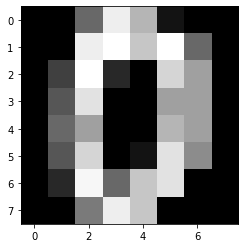

In [50]:
digits.data[0].reshape(8, 8)
print(d1)
print('разменость:', d1.shape)
plt.imshow(d1, cmap=plt.cm.Greys_r)

Так же можно воспользоваться блоком images, чтобы при просмотре данных каждый раз не изменять их размерность. Выведем первые 10 объектов датасета

In [73]:
img = digits.images

In [74]:
img.shape

(1797, 8, 8)

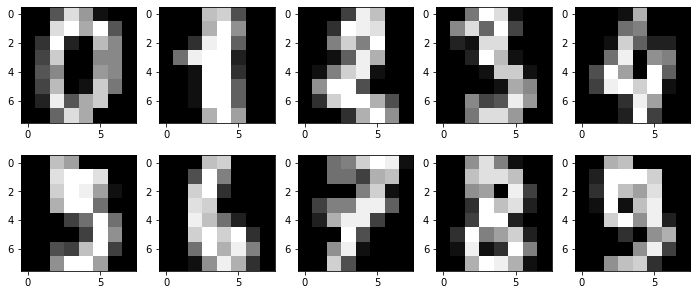

In [75]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5))
for ax, img_ in zip(axes.ravel(), digits.images):
    ax.imshow(img_, cmap='gray')


Представляем данные в виде матрицы объект-признак

In [78]:
X = img.reshape(img.shape[0], img.shape[1] * img.shape[2] )
#X = img.reshape(-1, 64)

In [80]:
X.shape

(1797, 64)

### Уменьшение размерности

In [83]:
tsne = TSNE(n_components=2, perplexity=30)

In [84]:
tsne.fit(X)

TSNE(perplexity=30)

In [85]:
X_embedded = tsne.embedding_

In [86]:
X_embedded.shape

(1797, 2)

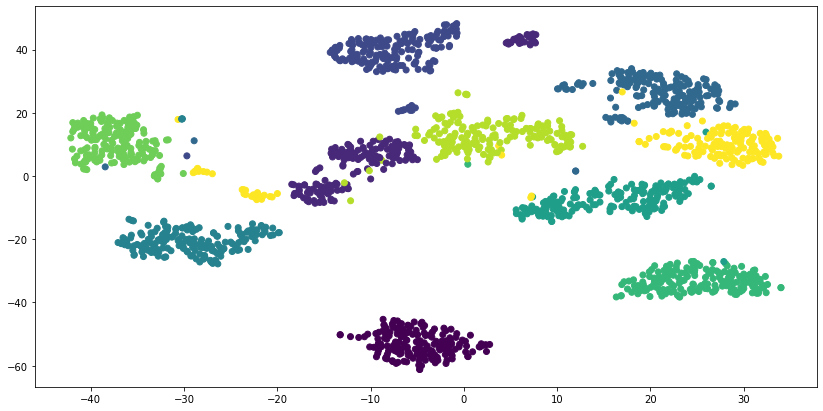

In [124]:
#plt.figsize(12,5)
plt.rcParams['figure.figsize'] = (14,7)
plt.scatter(X_embedded[:,0], X_embedded[:,1], #s=digits.target,
            c=digits.target)

In [120]:
params = [1, 3, 4, 10, 30, 50]

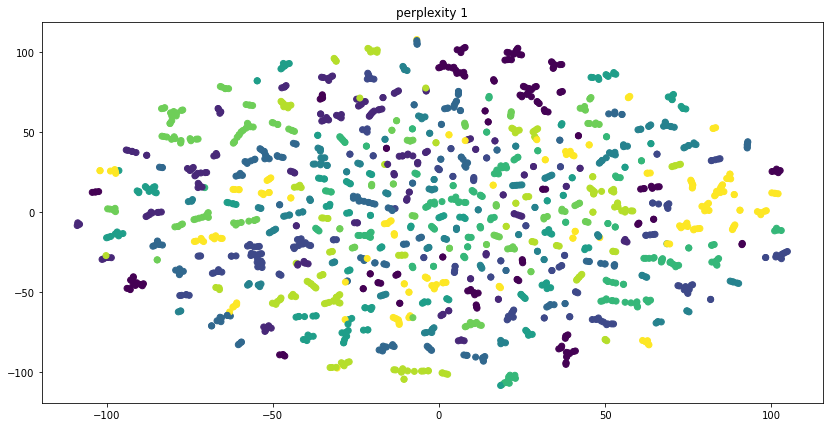

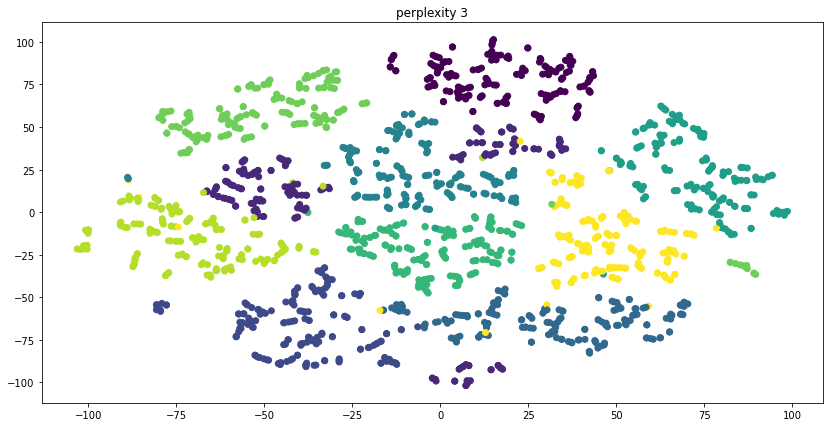

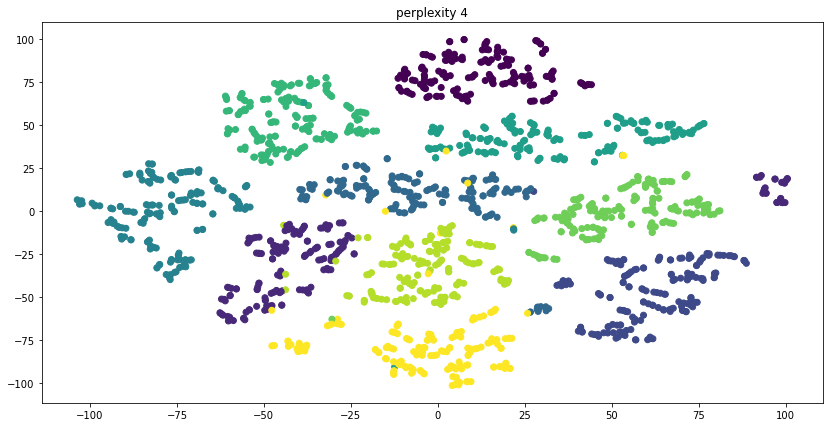

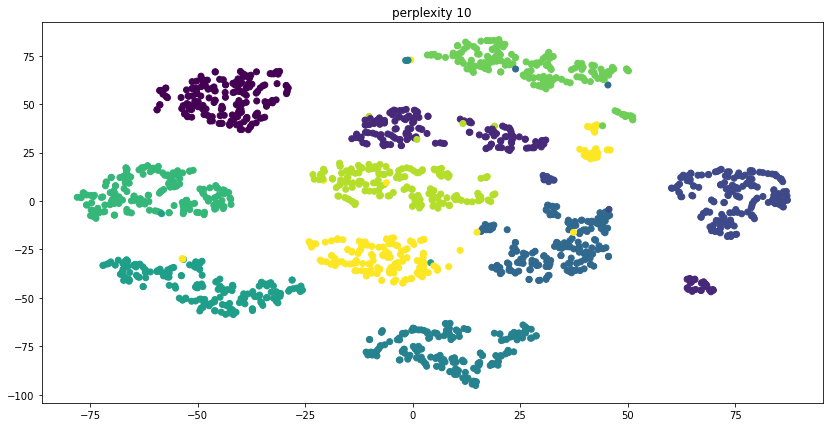

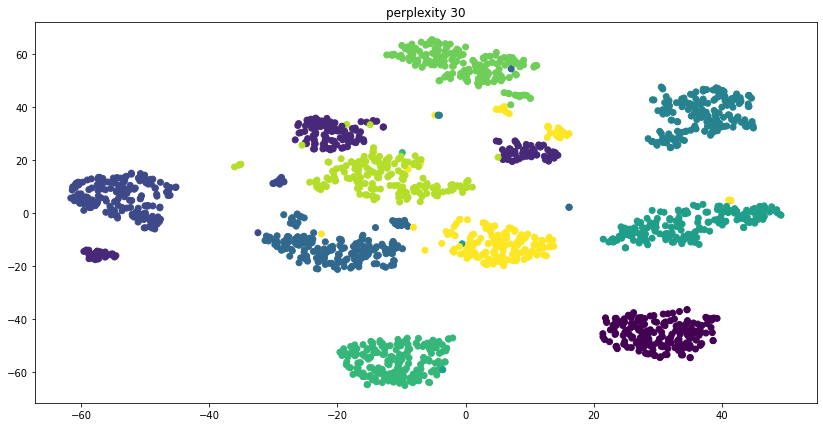

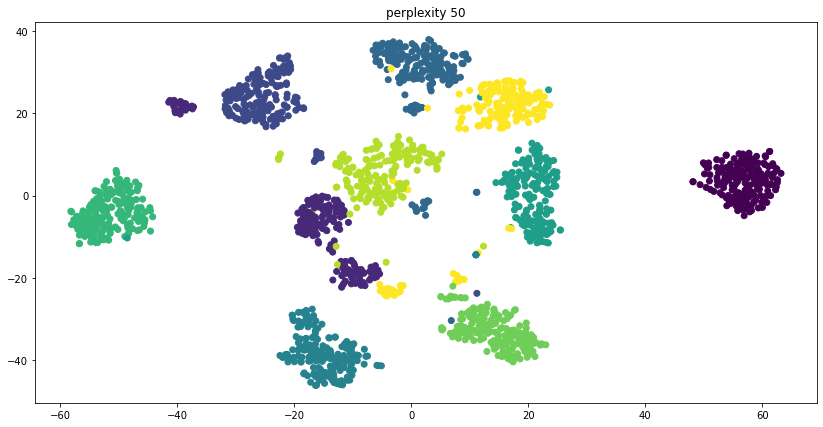

In [128]:
for p in params:
    tsne = TSNE(n_components=2, perplexity=p)
    tsne.fit(X)
    X_embedded = tsne.embedding_
    fit, ax = plt.subplots(1,1)
    ax.scatter(X_embedded[:,0], X_embedded[:,1], 
               c=digits.target
               #, cmap=plt.cm.gist_gray
              )
    ax.set_title('perplexity {}'.format(p))
    

Следовательно, чем больше значение perplexity, тем меньше кластеров и  расстояние между точками в отдельно взятом кластере и больше расстояние между этими кластерами (тем строже разбиение на кластеры)
С увеличением perplexity фокус на глобальную стуктуру данных станосится больше и наоборот

### Сравнение качества классификации до и после уменьшения размерности

In [136]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split

from collections import Counter

In [135]:
X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, 
                                                    test_size = 0.3, 
                                                    random_state = 42, 
                                                    shuffle=True)

In [138]:
print(Counter(y_train))

Counter({1: 132, 8: 131, 2: 130, 3: 129, 6: 128, 0: 125, 7: 124, 4: 121, 9: 121, 5: 116})


In [140]:
cl = KNeighborsClassifier()

In [141]:
cl.fit(X_train, y_train)

KNeighborsClassifier()

In [143]:
print(classification_report(cl.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      1.00      1.00        50
           2       1.00      1.00      1.00        47
           3       1.00      0.98      0.99        55
           4       1.00      0.98      0.99        61
           5       0.98      0.98      0.98        66
           6       1.00      1.00      1.00        53
           7       1.00      1.00      1.00        55
           8       1.00      1.00      1.00        43
           9       0.95      0.98      0.97        57

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Сделаем тоже самое, только уже в новом пространстве данных 2. Посмотрим находятся ли объекты в друших классах и как следвтвие ухудшение качества классификации

In [148]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_embedded, digits.target, 
                                                    test_size = 0.3, 
                                                    random_state = 42, 
                                                    shuffle=True)

In [149]:
cl.fit(X1_train, y1_train)

KNeighborsClassifier()

In [150]:
print(classification_report(cl.predict(X1_test), y1_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        53
           1       1.00      0.98      0.99        51
           2       1.00      1.00      1.00        47
           3       1.00      0.96      0.98        56
           4       1.00      0.98      0.99        61
           5       0.98      0.98      0.98        66
           6       1.00      0.98      0.99        54
           7       0.98      1.00      0.99        54
           8       0.98      1.00      0.99        42
           9       0.93      0.98      0.96        56

    accuracy                           0.99       540
   macro avg       0.99      0.99      0.99       540
weighted avg       0.99      0.99      0.99       540



Следовательно, видим, что качество классификации не упало => соотноение расстояния объектов сохранено